In [1]:
import pandas as pd

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns

In [3]:
df = pd.read_csv('~/Desktop/Online_Shoppers.csv')

In [4]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [5]:
df.shape

(12330, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

# Data Cleaning

In [7]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [8]:
len(df.columns)

18

# The specific analytic goals and each column's relevance to those goals determine which columns should be removed from the dataset.

Because the 'Administrative', 'Informational', and 'ProductRelated' columns indicate how many pages the user has viewed in each of these categories, and the 'PageValues' column already records the overall number of pages visited, I have opted to remove them in this instance. These columns were therefore deemed unnecessary for the analysis and superfluous.


In [9]:
df = df.drop(['Administrative', 'Informational', 'ProductRelated'], axis=1)

In [10]:
len(df.columns)

15

# Label Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
# List of categorical columns to encode
categorical_columns = ['Weekend', 'Revenue']

# Encode each column
for col in categorical_columns:
    encoder = LabelEncoder()
    encoder.fit(df[col])
    print(f'Column: {col}')
    print('Original categories:', list(encoder.classes_))
    print('Encoded values:', list(encoder.transform(encoder.classes_)))
    print('\n')
    df[col] = encoder.transform(df[col])

# Displaying the few rows of the df to verify the encoding
print(df.head())

Column: Weekend
Original categories: [False, True]
Encoded values: [0, 1]


Column: Revenue
Original categories: [False, True]
Encoded values: [0, 1]


   Administrative_Duration  Informational_Duration  ProductRelated_Duration  \
0                      0.0                     0.0                 0.000000   
1                      0.0                     0.0                64.000000   
2                      0.0                     0.0                 0.000000   
3                      0.0                     0.0                 2.666667   
4                      0.0                     0.0               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb          

In [13]:
df['Month'] = df['Month'].map({'Feb': 2, 'Mar': 3, 'May': 5,'June':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12})

In [14]:
df.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,Returning_Visitor,0,0
1,0.0,0.0,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,Returning_Visitor,0,0
2,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,Returning_Visitor,0,0
3,0.0,0.0,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,Returning_Visitor,0,0
4,0.0,0.0,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,Returning_Visitor,1,0


Text(0, 0.5, '')

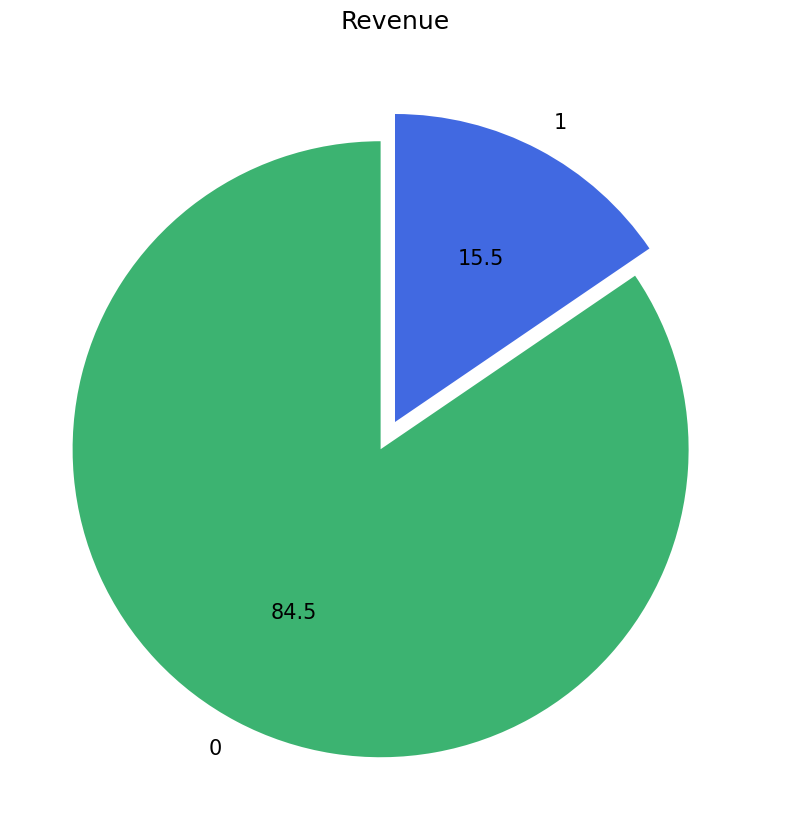

In [15]:
plt.figure(figsize=(10,10))
df['Revenue'].value_counts().plot(kind='pie',autopct='%1.1f', textprops={'fontsize': 15},startangle=90,explode =(0.1,0),colors=['mediumseagreen', 'royalblue'])
plt.title('Revenue', fontsize = 18)
plt.ylabel('')

In [16]:
df.duplicated().value_counts()

False    12157
True       173
dtype: int64

In [17]:
# Using the `duplicated` function for identifying duplicated rows
duplicated_rows = df[df.duplicated()]

# Print the duplicated rows
print(duplicated_rows)

       Administrative_Duration  Informational_Duration  \
158                        0.0                     0.0   
159                        0.0                     0.0   
178                        0.0                     0.0   
330                        0.0                     0.0   
356                        0.0                     0.0   
...                        ...                     ...   
11939                      0.0                     0.0   
12159                      0.0                     0.0   
12180                      0.0                     0.0   
12185                      0.0                     0.0   
12301                      0.0                     0.0   

       ProductRelated_Duration  BounceRates  ExitRates  PageValues  \
158                        0.0          0.2        0.2         0.0   
159                        0.0          0.2        0.2         0.0   
178                        0.0          0.2        0.2         0.0   
330                    

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
columns_to_scale = ['Administrative_Duration','Informational_Duration','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Exploratory Data Analysis

In [20]:
import pandas as pd

# Group the data by traffic type
grouped_df = df.groupby('TrafficType')

# Calculating average revenue per traffic type
avg_revenue = grouped_df['Revenue'].mean()

# Calculating total revenue per traffic type
tol_revenue = grouped_df['Revenue'].sum()

# Comparing revenue across traffic types
rev_comparison = pd.DataFrame({'Average Revenue': avg_revenue, 'Total Revenue': tol_revenue})

# Printing the revenue comparison
print(rev_comparison.head(5))


             Average Revenue  Total Revenue
TrafficType                                
1                   0.110455            262
2                   0.216624            847
3                   0.090000            180
4                   0.155075            165
5                   0.215385             56


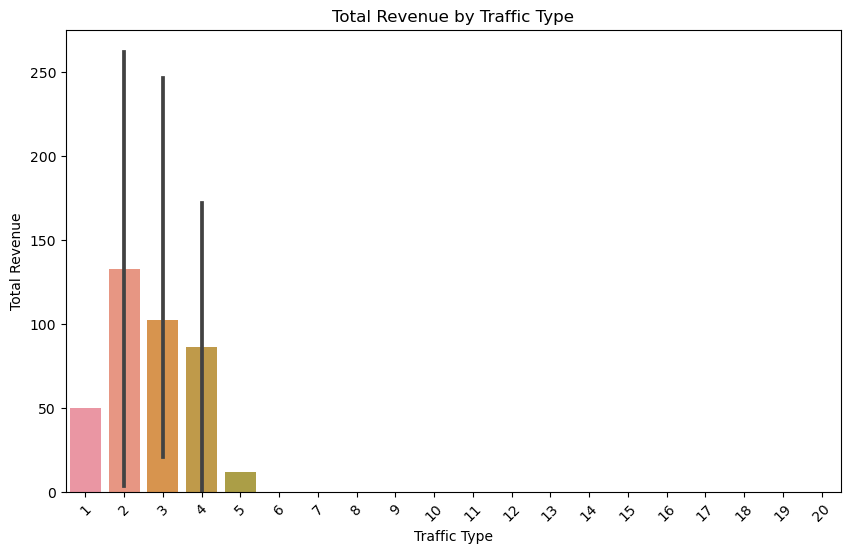

In [21]:
# Sorting the revenue comparison df in descending order based on the revenue metric
rev_comparison.sort_values(by='Total Revenue', ascending=False, inplace=True)

# Visualizing the sorted data
plt.figure(figsize=(10, 6))
sns.barplot(data=rev_comparison, x=df['TrafficType'], y='Total Revenue')
plt.title('Total Revenue by Traffic Type')
plt.xlabel('Traffic Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

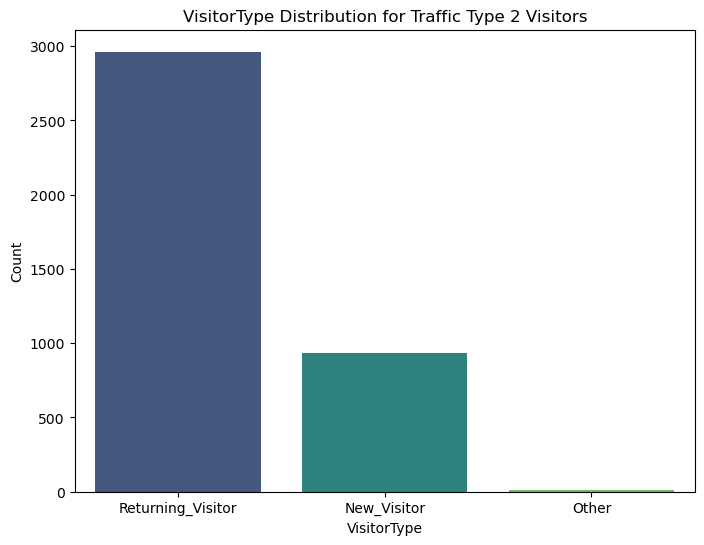

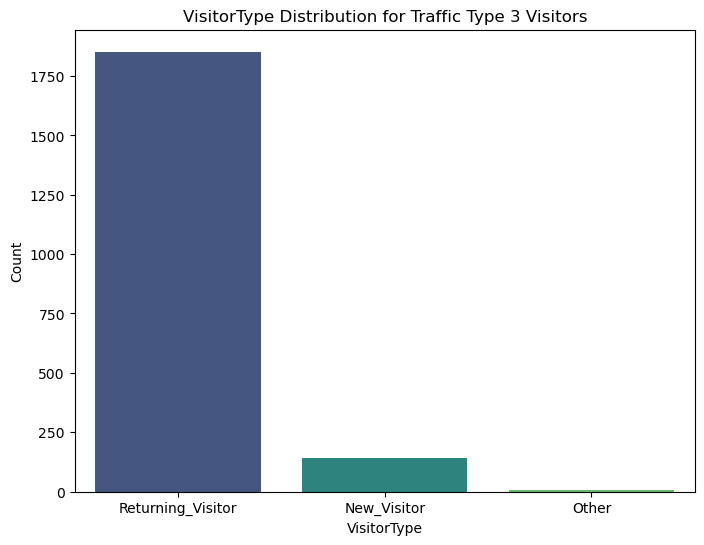

In [22]:
# Filter the dataset for Traffic Type 2 visitors
traffic_type2_data = df[df['TrafficType'] == 2]

# Filter the dataset for Traffic Type 3 visitors
traffic_type3_data = df[df['TrafficType'] == 3]

# Demographic analysis
demographic_variables = ['VisitorType']

for variable in demographic_variables:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=traffic_type2_data, x=variable, palette='viridis')
    plt.title(f'{variable} Distribution for Traffic Type 2 Visitors')
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.show()
    plt.figure(figsize=(8, 6))
    sns.countplot(data=traffic_type3_data, x=variable, palette='viridis')
    plt.title(f'{variable} Distribution for Traffic Type 3 Visitors')
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.show()


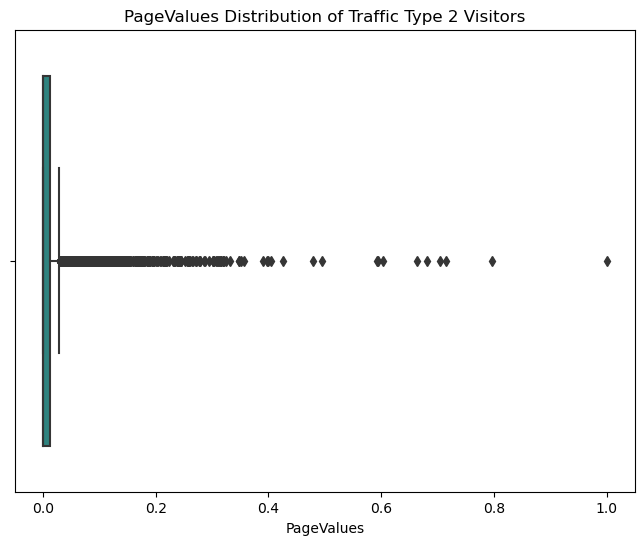

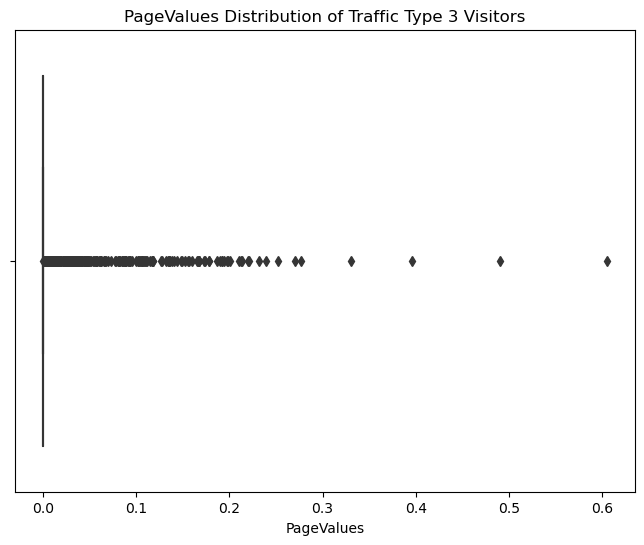

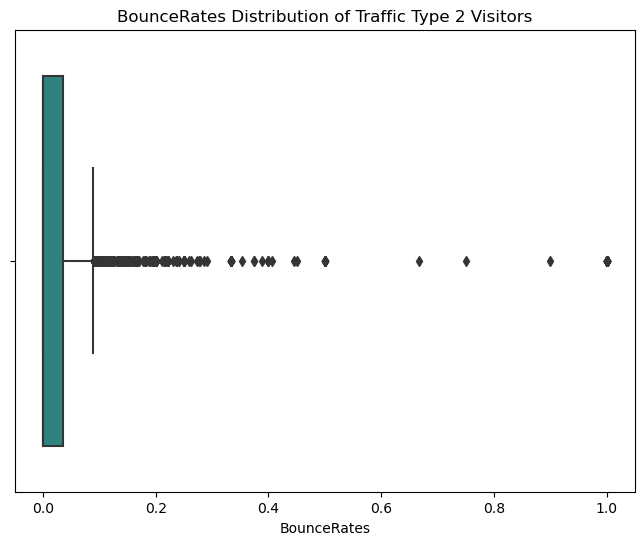

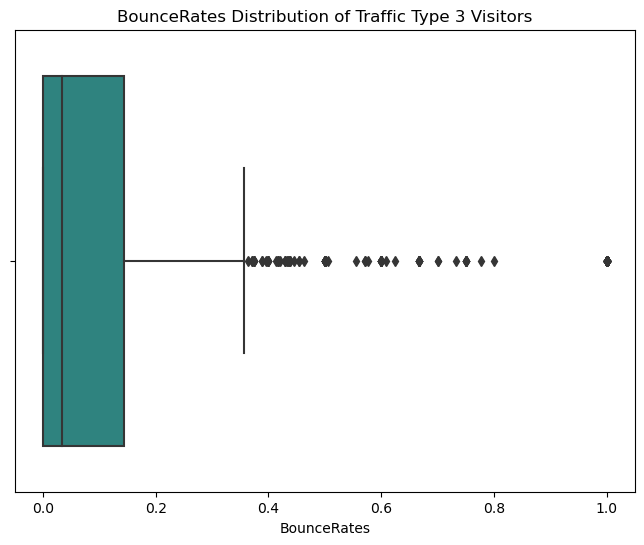

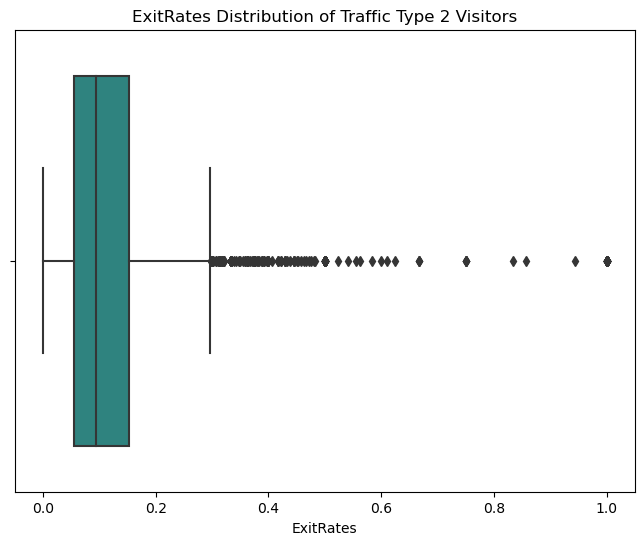

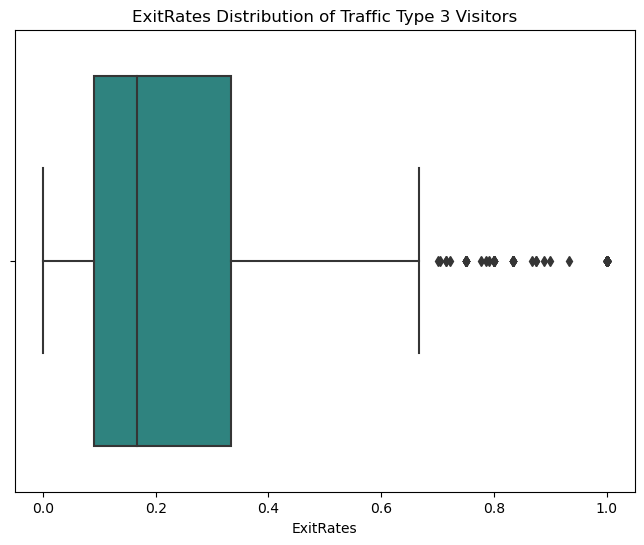

In [23]:
# Behavioral analysis
behavioural_variables = ['PageValues', 'BounceRates', 'ExitRates']

for variable in behavioural_variables:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=traffic_type2_data, x=variable, palette='viridis')
    plt.title(f'{variable} Distribution of Traffic Type 2 Visitors')
    plt.xlabel(variable)
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.boxplot(data=traffic_type3_data, x=variable, palette='viridis')
    plt.title(f'{variable} Distribution of Traffic Type 3 Visitors')
    plt.xlabel(variable)
    plt.show()

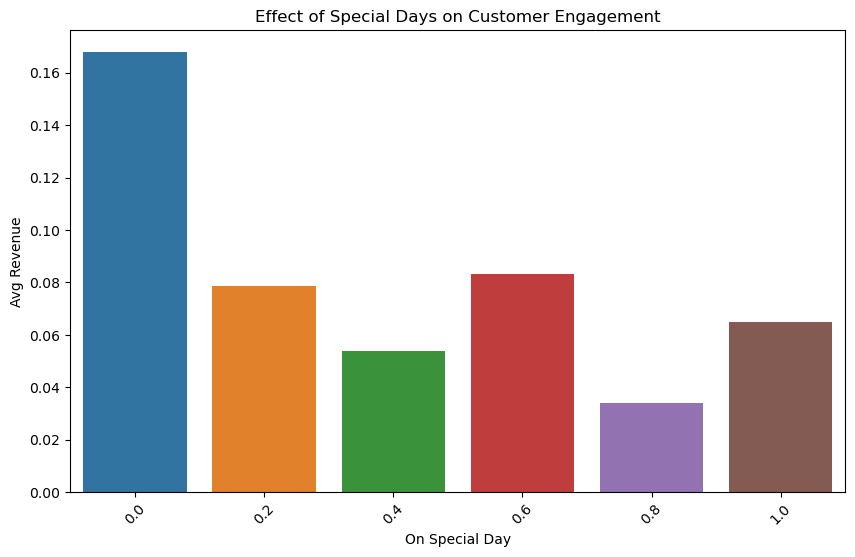

Special Days with the massive effect on Customer Engagement:
- 0.0: 0.16779692082111436
- 0.6: 0.0830945558739255
- 0.2: 0.07865168539325842


In [24]:
# Grouping the data by 'SpecialDay' and calculating the avg revenue or visitor count
specialday_analysis = df.groupby('SpecialDay')['Revenue'].mean()  # Replace 'Revenue' with the appropriate metric

# Sorting the data in descending order based on the avg revenue or visitor count
specialday_analysis = specialday_analysis.sort_values(ascending=False)

# Visualizing the effect of special days on customer engagement
plt.figure(figsize=(10, 6))
sns.barplot(x=specialday_analysis.index, y=specialday_analysis.values)
plt.title("Effect of Special Days on Customer Engagement")
plt.xlabel("On Special Day")
plt.ylabel("Avg Revenue" ) 
plt.xticks(rotation=45)
plt.show()

# Identifying the special days with the highest impact on customer engagement
top_specialdays = specialday_analysis.head(3)  
print("Special Days with the massive effect on Customer Engagement:")
for day, effect in top_specialdays.items():
    print(f"- {day}: {effect}")


C:\Users\user\AppData\Local\Temp\ipykernel_2536\4088098264.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


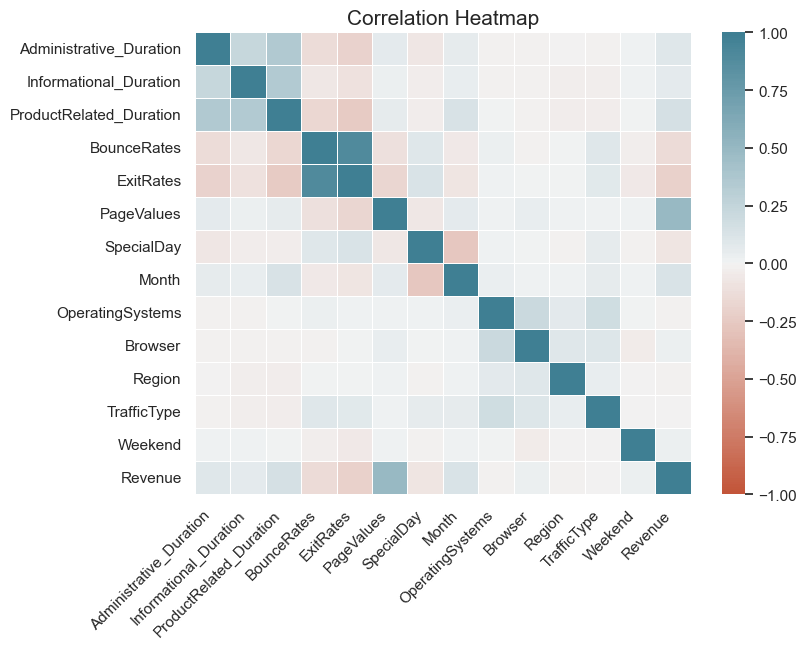

In [25]:
corr=df.corr()

plt.figure(figsize=(8, 6))
sns.set(style='white')
sns.heatmap(corr,
            vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=200), linewidths=0.5)
plt.title('Correlation Heatmap', size=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

In [26]:
import warnings
warnings.filterwarnings('ignore')

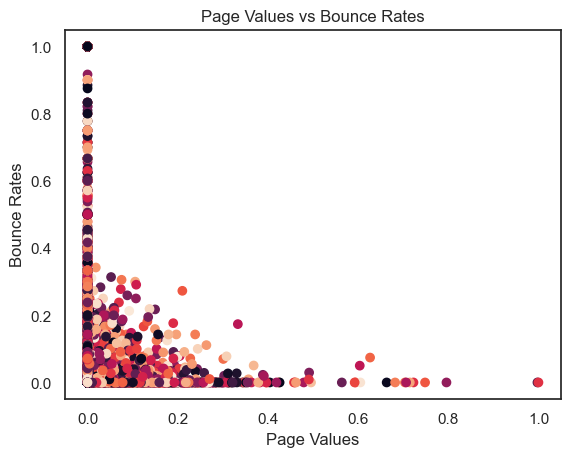

In [27]:
n=len(df)
colours = np.random.rand(n)
plt.scatter(df['PageValues'], df['BounceRates'],c=colours)
plt.title('Page Values vs Bounce Rates')
plt.xlabel('Page Values')
plt.ylabel('Bounce Rates')
plt.show()

In [28]:
from imblearn.over_sampling import SMOTE

# Dealing Class Imbalance

In [29]:
df.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.000000,1.00,1.00,0.0,0.0,2,1,1,1,1,Returning_Visitor,0,0
1,0.0,0.0,0.001000,0.00,0.50,0.0,0.0,2,2,2,1,2,Returning_Visitor,0,0
2,0.0,0.0,0.000000,1.00,1.00,0.0,0.0,2,4,1,9,3,Returning_Visitor,0,0
3,0.0,0.0,0.000042,0.25,0.70,0.0,0.0,2,3,2,2,4,Returning_Visitor,0,0
4,0.0,0.0,0.009809,0.10,0.25,0.0,0.0,2,3,3,1,4,Returning_Visitor,1,0


In [30]:
df['Revenue'].value_counts()

0    10249
1     1908
Name: Revenue, dtype: int64

In [31]:
X=df.drop('Revenue',axis=1)
y=df['Revenue']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [34]:
X_train.shape

(9725, 14)

In [35]:
y_test.shape

(2432,)

In [36]:
X_test.shape

(2432, 14)

In [37]:
X_train[:5]

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
2811,0.000000,0.0,0.006888,0.078947,0.232456,0.000000,0.4,5,2,5,3,3,Returning_Visitor,0
4466,0.007473,0.0,0.046246,0.027027,0.109234,0.015693,0.4,5,2,5,2,3,Returning_Visitor,0
10593,0.031543,0.0,0.008023,0.000000,0.060150,0.048502,0.0,11,2,2,1,10,Returning_Visitor,0
12153,0.000000,0.0,0.004357,0.142857,0.214286,0.000000,0.0,12,3,2,1,20,New_Visitor,0
8359,0.000000,0.0,0.018226,0.129630,0.222222,0.000000,0.0,12,2,5,3,1,Returning_Visitor,1


In [38]:
y_test.value_counts()

0    2050
1     382
Name: Revenue, dtype: int64

In [39]:
y_test.shape

(2432,)

# I'm using SMOTE technique for class Imbalance

In [40]:
from imblearn.over_sampling import SMOTE

# Performing one-hot encoding on the categorical features
X_encoded = pd.get_dummies(X)

# Applying SMOTE technique on the encoded features and target variable
smote = SMOTE(sampling_strategy='minority')
X_smote, y_smote = smote.fit_resample(X_encoded, y)

# Converting the resampled target variable to a pandas Series
y_smote = pd.Series(y_smote)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=15, stratify=y_smote)

In [42]:
# Number of classes in training Data
y_train.value_counts()

0    8199
1    8199
Name: Revenue, dtype: int64

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()

In [45]:
# Standardize the data
scaler = StandardScaler()
X_train_sm_scaled = scaler.fit_transform(X_train)
X_testscaled = scaler.transform(X_test)

# PCA(Principle Component Analysis)

In [46]:
from sklearn.decomposition import PCA

In [47]:
# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_trainpca = pca.fit_transform(X_train_sm_scaled)
X_testpca = pca.transform(X_testscaled)

In [48]:
# Creating a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_trainpca, columns=['PC1', 'PC2'])
pca_df['Revenue'] = y_train.values

In [49]:
# Apply PCA with more components
pca = PCA(n_components=10)  # Adjust the number of components as needed

X_trainpca = pca.fit_transform(X_train_sm_scaled)
X_testpca = pca.transform(X_testscaled)
# Variance explained by each principal component
explained_variance = pca.explained_variance_ratio_
print(f'Explained variance by each component: {explained_variance}')
print(f'Total explained variance: {sum(explained_variance):.2f}')

Explained variance by each component: [0.15228278 0.13331398 0.11845844 0.07974135 0.07144342 0.06351594
 0.06022762 0.05472385 0.05346901 0.04728486]
Total explained variance: 0.83


In [50]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.15228278, 0.13331398, 0.11845844, 0.07974135, 0.07144342,
       0.06351594, 0.06022762, 0.05472385, 0.05346901, 0.04728486])

In [51]:
sns.set_style(style='whitegrid', rc=None)

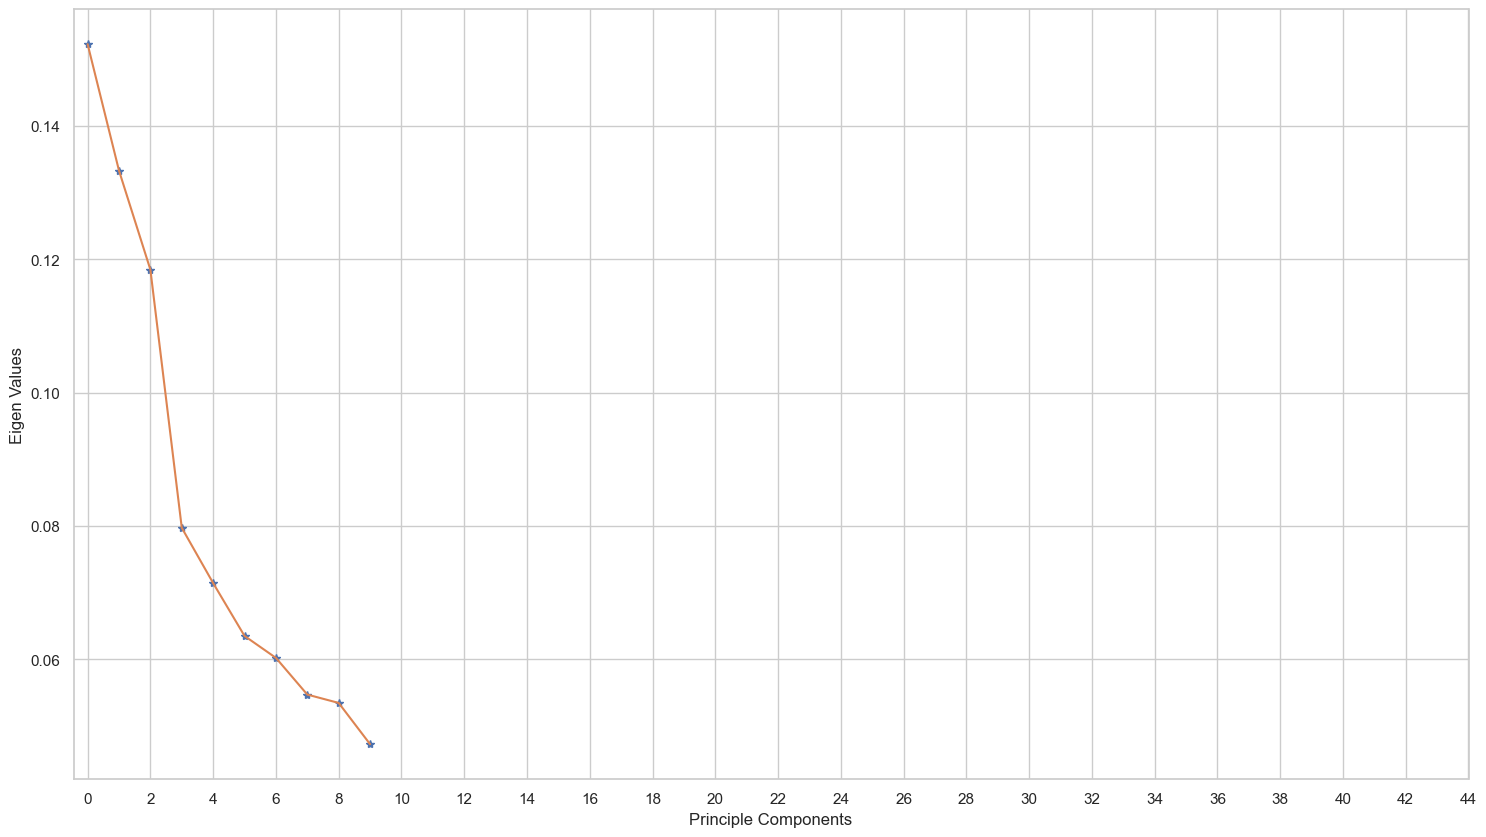

In [52]:
plt.figure(figsize=(18 , 10))

plt.plot(pca.explained_variance_ratio_,'*')
plt.plot(pca.explained_variance_ratio_)
plt.xticks(range(0,45,2))
plt.xlabel('Principle Components')
plt.ylabel('Eigen Values')
plt.show()

# Machine Learning Models


# 1.K-NN Model

In [190]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

In [191]:
knn_model = KNeighborsRegressor(n_neighbors=3)
clf = knn_model.fit(X_train, y_train)

In [192]:
y_pred = knn_model.predict(X_test)

In [193]:
import numpy as np
from sklearn.metrics import classification_report

# Checking the unique values in y_test and y_pred
print("Unique Values in y_test:", np.unique(y_test))
print("Unique Values in y_pred:", np.unique(y_pred))

# Assuming a threshold of 0.5 for binary classification though y_pred contains continuous values
if y_pred.dtype == 'float' or np.any((y_pred != 0) & (y_pred != 1)):
    y_pred = (y_pred >= 0.5).astype(int)

# Printing the classification report

print(classification_report(y_test, y_pred))


Unique Values in y_test: [0 1]
Unique Values in y_pred: [0.         0.33333333 0.66666667 1.        ]
              precision    recall  f1-score   support

           0       0.91      0.76      0.83      2050
           1       0.79      0.92      0.85      2050

    accuracy                           0.84      4100
   macro avg       0.85      0.84      0.84      4100
weighted avg       0.85      0.84      0.84      4100



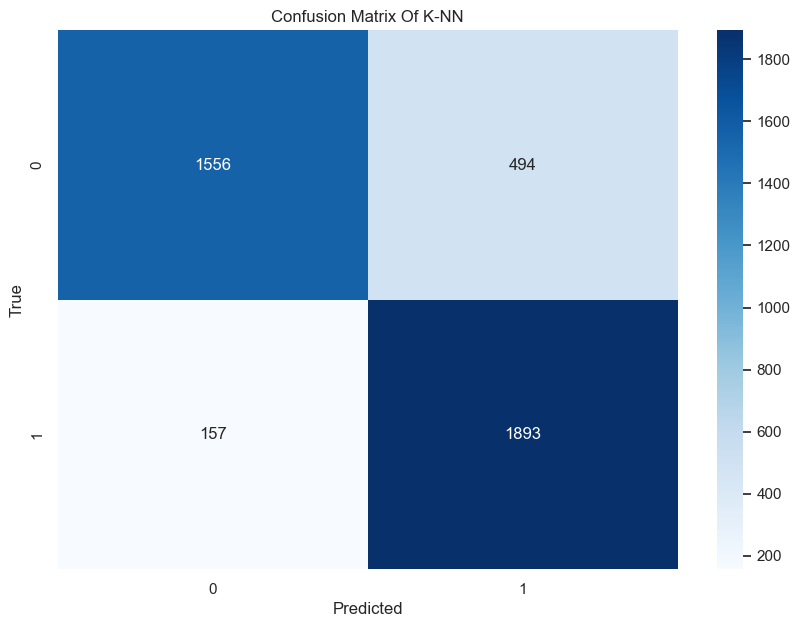

In [194]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix Of K-NN")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [195]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

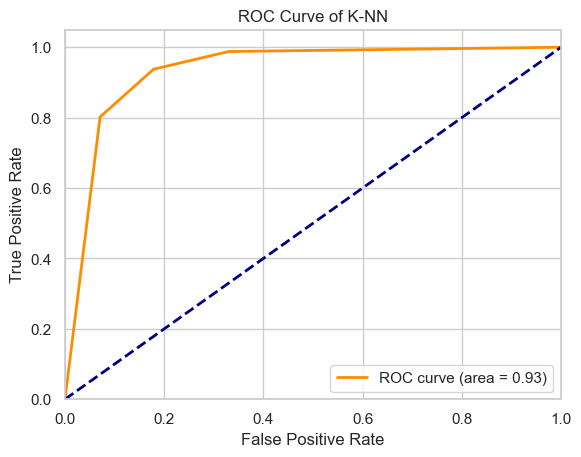

In [196]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', KNeighborsClassifier(n_neighbors=3))
])

# Fit and predict
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# Predict probabilities for the test data
y_probs = pipe.predict_proba(X_test)[:, 1] 
# Calculating ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of K-NN')
plt.legend(loc="lower right")
plt.show()

In [197]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring='roc_auc')
print(f'Cross-validated AUC scores: {scores}')
print(f'Mean AUC score: {scores.mean()}')


Cross-validated AUC scores: [0.92548483 0.9273286  0.92171327 0.92072408 0.9177019 ]
Mean AUC score: 0.9225905352921556


# 2. Decision Tree Classifier

In [198]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score

In [199]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predicting the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8917073170731707


In [200]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2050
           1       0.89      0.89      0.89      2050

    accuracy                           0.89      4100
   macro avg       0.89      0.89      0.89      4100
weighted avg       0.89      0.89      0.89      4100



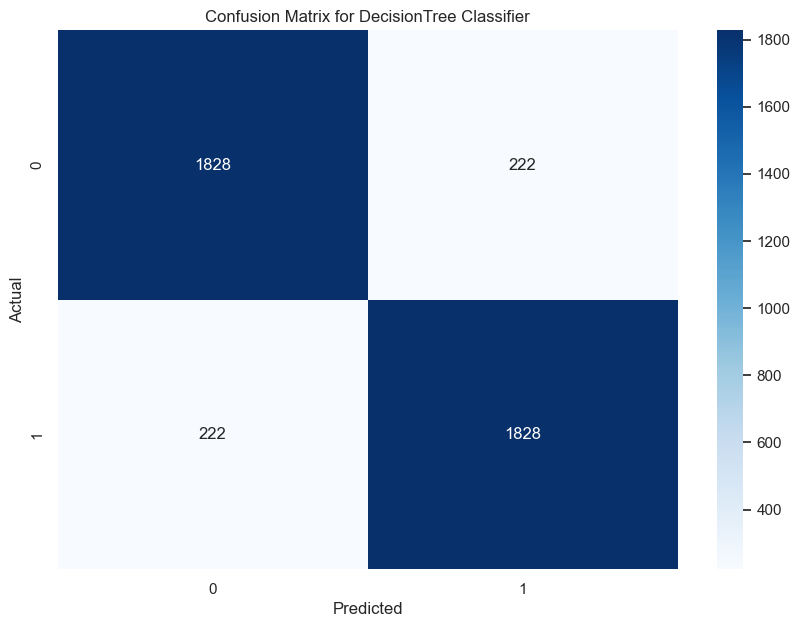

In [201]:
cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion Matrix for DecisionTree Classifier')
plt.show()

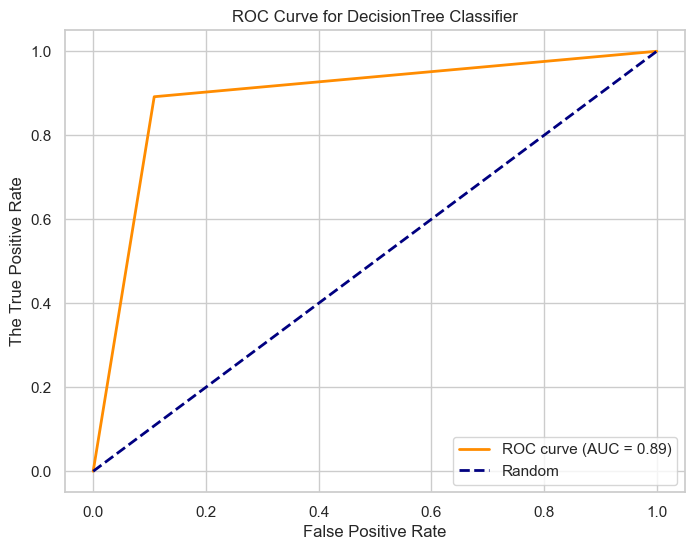

In [202]:

# Compute ROC curve and area under the curve (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('The True Positive Rate')
plt.title('ROC Curve for DecisionTree Classifier')
plt.legend(loc='lower right')
plt.show()

# 3.Support Vector Machines

In [203]:
from sklearn.svm import SVC
#Building and training our model
clf = SVC(kernel='linear')
svc_clf = clf.fit(X_train, y_train)

In [204]:
#Predict the response for test dataset
y_pred = svc_clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8358536585365853


In [205]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      2050
           1       0.90      0.75      0.82      2050

    accuracy                           0.84      4100
   macro avg       0.85      0.84      0.83      4100
weighted avg       0.85      0.84      0.83      4100



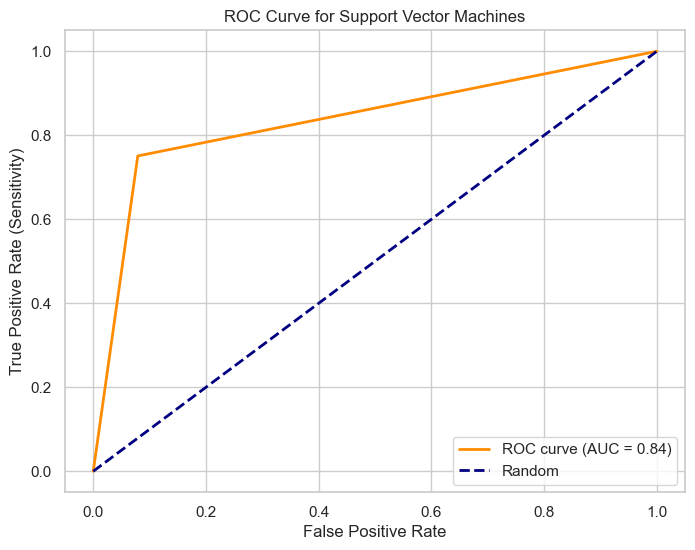

In [206]:
# Compute ROC curve and area under the curve (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for Support Vector Machines')
plt.legend(loc='lower right')
plt.show()


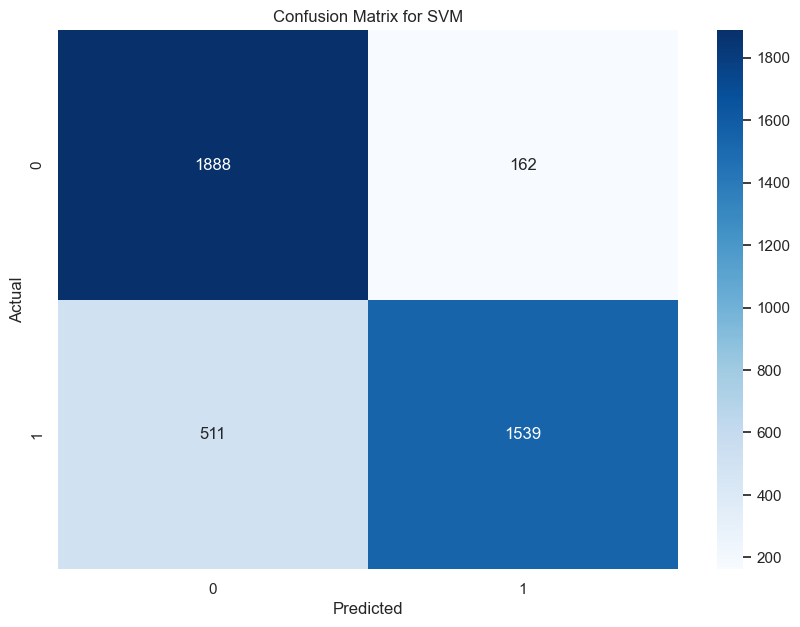

[[1888  162]
 [ 511 1539]]


In [207]:
cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion Matrix for SVM')
plt.show()
print(cm)

# 4.RandomForest Classifier Model

In [208]:
from sklearn.ensemble import RandomForestClassifier

In [209]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

pipe = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(n_estimators=75, min_samples_leaf=4, max_features='sqrt', max_samples=0.9, max_depth=None, criterion='entropy', random_state=42))
])

# Fit and predict
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# Predict probabilities for the test data
y_probs = pipe.predict_proba(X_test)[:, 1]  # get the probability of the positive class

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.94      0.90      0.92      2050
           1       0.90      0.94      0.92      2050

    accuracy                           0.92      4100
   macro avg       0.92      0.92      0.92      4100
weighted avg       0.92      0.92      0.92      4100



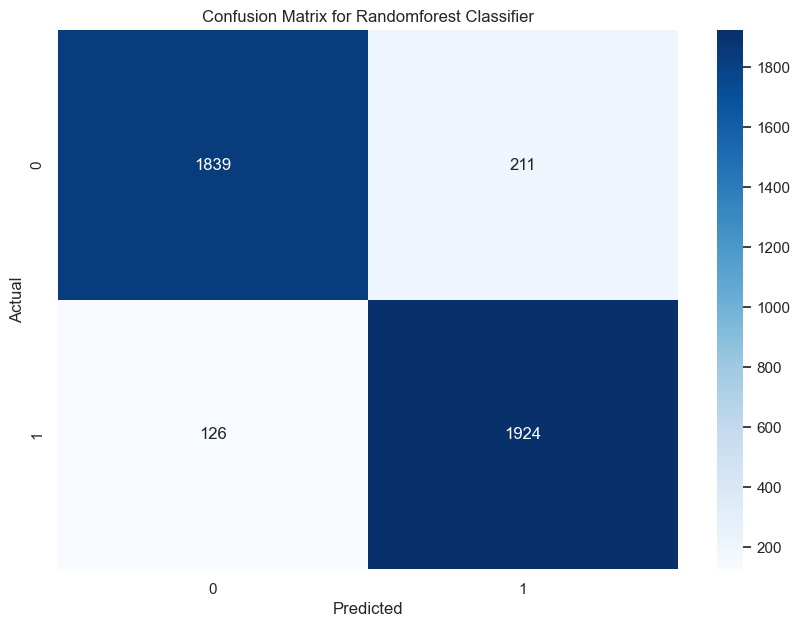

[[1839  211]
 [ 126 1924]]


In [210]:
cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Confusion Matrix for Randomforest Classifier')
plt.show()
print(cm)

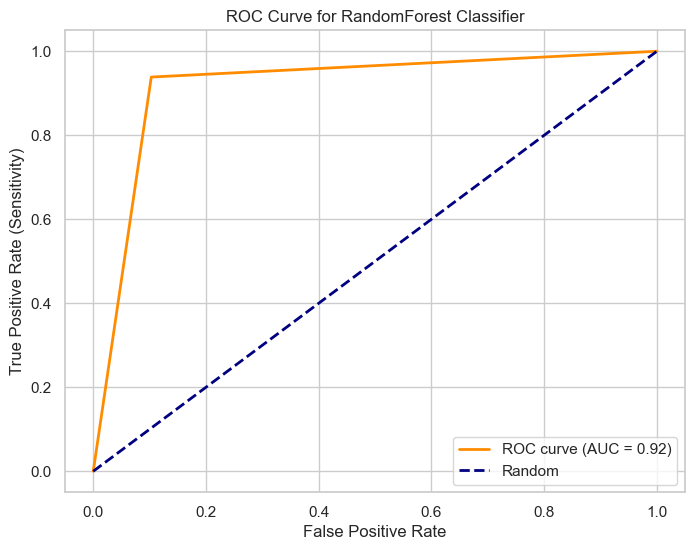

In [211]:
# Compute ROC curve and area under the curve (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve for RandomForest Classifier')
plt.legend(loc='lower right')
plt.show()

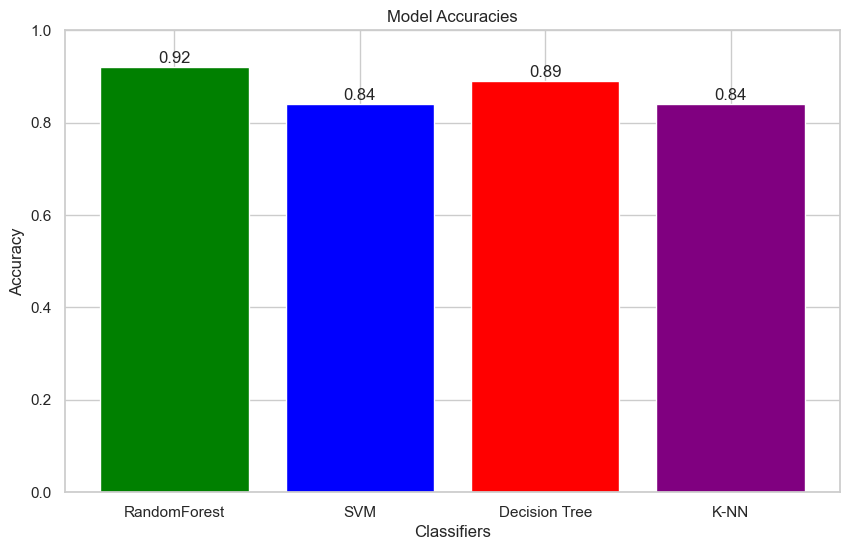

In [213]:


Models = ['RandomForest', 'SVM', 'Decision Tree', 'K-NN']
accuracies = [0.92, 0.84, 0.89, 0.84]

# Creating the bar graph
plt.figure(figsize=(10, 6))
plt.bar(Models, accuracies, color=['green', 'blue', 'red', 'purple'])

# Adding titles and labels
plt.title('Model Accuracies')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  

# Displaying the accuracy values on top of the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f"{accuracy:.2f}", ha='center')

# Show the plot
plt.show()

